<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/ProcDados_dask_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade "dask[dataframe]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2023.8.1
    Uninstalling dask-2023.8.1:
      Successfully uninstalled dask-2023.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.8.1 requires dask==2023.8.1, but you have dask 2024.1.1 which is incompatible.


In [ ]:
!pip install --upgrade "dask[distributed]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: distributed
    Found existing installation: distributed 2023.8.1
    Uninstalling distributed-2023.8.1:
      Successfully uninstalled distributed-2023.8.1


In [ ]:
!pip install --upgrade pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import sys

from dask.distributed import Client, LocalCluster

# Existe integração com pandas, então customização da configuração do pandas também funciona aqui

# Não limitar a largura das colunas apresentadas
pd.options.display.max_colwidth = None
# Não usar a notação científica (ex: 6.125000e-02) e usar 2 casas decimais (ex: 0.06)
pd.options.display.float_format = "{:.2f}".format

In [ ]:
# Criar cluster local anexado ao kernel do notebook
cluster = LocalCluster(n_workers=1)
client = Client(cluster)
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:33529
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37453'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:41885', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41885
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41694
INFO:distributed.scheduler:Receive client connection: Client-1ad1a750-c207-11ee-80c9-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41698


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 2,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33529,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:41885,Total threads: 2
Dashboard: http://127.0.0.1:36773/status,Memory: 12.67 GiB
Nanny: tcp://127.0.0.1:37453,


In [ ]:
# Descomente e execute as linhas abaixo para desligar o cluster

# client.close()
# cluster.close()

In [ ]:
ROOT_DATA_PATH = "drive/MyDrive/data"

## Explorando o dataset

In [ ]:
# Ler os dados de transações de bitcoin dos arquivos CSV
# Obs:
#     O primeiro * é porque existem várias pastas dentro da pasta bitcoin
#     O segundo * é porque existem vários arquivos CSV dentro de cada uma dessas pastas

bitcoin_df = dd.read_csv(f'{ROOT_DATA_PATH}/bitcoin/*/*.csv')
bitcoin_df

,Height,Input,Output,Sum,Time
npartitions=46,,,,,
,int64,object,object,object,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [ ]:
bitcoin_df.head()

,Height,Input,Output,Sum,Time
0,546,"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1DCbY2GYVaAMCBpuBNN5GVg3a47pNK1wdi']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '24']",['25'],2009-01-15 06:08:20
1,546,"['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '25']",['25'],2009-01-15 06:08:20
2,546,['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv'],"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1', '1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '24']",['25'],2009-01-15 06:08:20
3,586,"['1DNdPgBZRWjDj1JbVZQEYMv7jvqJF7R4Py', '1ELmSkQWnqgbBZNzxAZHts3MEYCngqRBeD', '1ADpf5rHERc2PmVAZZFoH7WbougKvkPDVD', '1ACWHyRM8rtbt96KauPJprnF2qDQSdPJ54', '1LfjLrBDYyPbvGMiD9jURxyAupdYujsBdK']","['19QKDUJtx9n7Vaga6nX1bVHdsnT4Khfyi6', '250']",['250'],2009-01-15 14:25:20
4,586,['1E5npMTmh9PnBHxCacuqzAZRGEybkxPMAq'],"['1QKJnFPvRoZ7avBhxqwxhsEv62JWYoB1R9', '50']",['50'],2009-01-15 14:25:20


In [ ]:
%%time

len(bitcoin_df)

CPU times: user 4.62 s, sys: 739 ms, total: 5.36 s
Wall time: 1min 24s


13494203

## Executando operações nos dados mais rapidamente com Parquet

O **Parquet** é um formato de armazenamento de dados otimizado para leitura e gravação eficientes em ambientes de big data. É especialmente útil quando se trata de conjuntos de dados grandes e distribuídos.

* **Formato Colunar:** O Parquet é um formato de armazenamento colunar, o que significa que armazena os dados por coluna em vez de por linha. Isso é diferente dos formatos de armazenamento de linha, como o CSV, onde os dados são armazenados por linha.

* **Compressão:** O Parquet suporta compressão, o que resulta em tamanhos de arquivo menores. Ele usa algoritmos de compressão eficientes, tornando-o eficaz para reduzir o espaço em disco necessário para armazenar grandes conjuntos de dados.

* **Esquema Integrado:** O Parquet armazena o esquema (estrutura dos dados) junto com os dados. Isso significa que, ao ler os dados, o sistema sabe exatamente como interpretar cada coluna, evitando a necessidade de inferir o esquema a cada leitura.

* **Particionamento:** Pode ser particionado em diferentes seções, o que é benéfico para consultas específicas, pois apenas as partições relevantes precisam ser lidas.

In [ ]:
%%time

# Vamos salvar os dados de forma distribuída em arquivo Parquet para melhorar a performance
# Ele está usando o mecanismo PyArrow para efetuar essa operação de gravação de dataframe no formato parquet
# overwrite=True: Este parâmetro indica que, se o diretório já existir, ele será sobrescrito.
# engine='pyarrow': Indica o mecanismo PyArrow para gravação.
bitcoin_df.to_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet', overwrite=True, engine='pyarrow')

CPU times: user 6.77 s, sys: 876 ms, total: 7.65 s
Wall time: 2min 2s


In [ ]:
# Lê os dados Parquet de volta para um DataFrame Dask, utilizando novamente o mecanismo PyArrow.
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet', engine='pyarrow')
bitcoin_df

,Height,Input,Output,Sum,Time
npartitions=46,,,,,
,int64,object,object,object,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [ ]:
%%time

len(bitcoin_df)

CPU times: user 220 ms, sys: 18.1 ms, total: 239 ms
Wall time: 1.54 s


13494203

In [ ]:
bitcoin_df.head()

,Height,Input,Output,Sum,Time
0,546,"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1DCbY2GYVaAMCBpuBNN5GVg3a47pNK1wdi']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '24']",['25'],2009-01-15 06:08:20
1,546,"['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '25']",['25'],2009-01-15 06:08:20
2,546,['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv'],"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1', '1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '24']",['25'],2009-01-15 06:08:20
3,586,"['1DNdPgBZRWjDj1JbVZQEYMv7jvqJF7R4Py', '1ELmSkQWnqgbBZNzxAZHts3MEYCngqRBeD', '1ADpf5rHERc2PmVAZZFoH7WbougKvkPDVD', '1ACWHyRM8rtbt96KauPJprnF2qDQSdPJ54', '1LfjLrBDYyPbvGMiD9jURxyAupdYujsBdK']","['19QKDUJtx9n7Vaga6nX1bVHdsnT4Khfyi6', '250']",['250'],2009-01-15 14:25:20
4,586,['1E5npMTmh9PnBHxCacuqzAZRGEybkxPMAq'],"['1QKJnFPvRoZ7avBhxqwxhsEv62JWYoB1R9', '50']",['50'],2009-01-15 14:25:20


In [ ]:
# verifica o número de elementos na primeira partição do DataFrame Dask
# bitcoin_df.partitions: É uma lista que contém as partições do DataFrame Dask.
# Cada partição é essencialmente um subconjunto dos dados totais.
len(bitcoin_df.partitions[0])

14832

In [ ]:
type(bitcoin_df.partitions[0])

dask.dataframe.core.DataFrame

In [ ]:
# Verifica o número de partições
bitcoin_df.npartitions

46

## Criando novas colunas

In [ ]:
%%time

bitcoin_df['Time'].head()

CPU times: user 15.8 ms, sys: 3.01 ms, total: 18.8 ms
Wall time: 36.2 ms


0    2009-01-15 06:08:20
1    2009-01-15 06:08:20
2    2009-01-15 06:08:20
3    2009-01-15 14:25:20
4    2009-01-15 14:25:20
Name: Time, dtype: object

In [ ]:
%%time

# A coluna 'Time' possui uma string que representa uma data e hora
# Vamos transformar a string em datetime com dd.to_datetime

bitcoin_df['Time'] = dd.to_datetime(bitcoin_df['Time'])
bitcoin_df['Date'] = bitcoin_df['Time'].dt.date.astype(str) # Criar uma coluna com a data da coluna 'Time'
bitcoin_df['Year'] = bitcoin_df['Time'].dt.year # Criar uma coluna com o ano da coluna 'Time'
bitcoin_df['Month'] = bitcoin_df['Time'].dt.month # Criar uma coluna com o mês da coluna 'Time'
bitcoin_df['Day'] = bitcoin_df['Time'].dt.day # Criar uma coluna com o dia da coluna 'Time'
bitcoin_df['Weekday'] = bitcoin_df['Time'].dt.weekday # Criar uma coluna com o dia da semana da coluna 'Time'

CPU times: user 48.7 ms, sys: 484 µs, total: 49.2 ms
Wall time: 53.1 ms


In [ ]:
bitcoin_df.head(3)

,Height,Input,Output,Sum,Time,Date,Year,Month,Day,Weekday
0,546,"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1DCbY2GYVaAMCBpuBNN5GVg3a47pNK1wdi']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '24']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
1,546,"['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '25']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
2,546,['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv'],"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1', '1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '24']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3


In [ ]:
bitcoin_df

,Height,Input,Output,Sum,Time,Date,Year,Month,Day,Weekday
npartitions=46,,,,,,,,,,
,int64,object,object,object,datetime64[ns],object,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...


In [ ]:
%%time

bitcoin_df.to_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_new_cols', overwrite=True, engine='pyarrow')

CPU times: user 6.41 s, sys: 771 ms, total: 7.19 s
Wall time: 1min 54s


In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_new_cols', engine='pyarrow')
bitcoin_df

,Height,Input,Output,Sum,Time,Date,Year,Month,Day,Weekday
npartitions=46,,,,,,,,,,
,int64,object,object,object,datetime64[ns],object,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...


In [ ]:
bitcoin_df.head()

,Height,Input,Output,Sum,Time,Date,Year,Month,Day,Weekday
0,546,"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1DCbY2GYVaAMCBpuBNN5GVg3a47pNK1wdi']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '24']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
1,546,"['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '25']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
2,546,['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv'],"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1', '1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '24']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
3,586,"['1DNdPgBZRWjDj1JbVZQEYMv7jvqJF7R4Py', '1ELmSkQWnqgbBZNzxAZHts3MEYCngqRBeD', '1ADpf5rHERc2PmVAZZFoH7WbougKvkPDVD', '1ACWHyRM8rtbt96KauPJprnF2qDQSdPJ54', '1LfjLrBDYyPbvGMiD9jURxyAupdYujsBdK']","['19QKDUJtx9n7Vaga6nX1bVHdsnT4Khfyi6', '250']",['250'],2009-01-15 14:25:20,2009-01-15,2009,1,15,3
4,586,['1E5npMTmh9PnBHxCacuqzAZRGEybkxPMAq'],"['1QKJnFPvRoZ7avBhxqwxhsEv62JWYoB1R9', '50']",['50'],2009-01-15 14:25:20,2009-01-15,2009,1,15,3


In [ ]:
%%time

# Vamos pegar a Series da coluna 'Time' e filtrar somente valores que o dia da semana é 0 para ver qual dia da semana é
# Para verificar o dia da semana de uma data pesquise no Google usando o exemplo "day of 2010-01-25"
# Obs: a função where retorna o valor NaT (Not a Time) quando a condição não é atendida, por isso é utilizado o dropna

t = bitcoin_df['Time']
t.where(t.dt.weekday == 0).dropna().head()

CPU times: user 27.6 ms, sys: 1.47 ms, total: 29.1 ms
Wall time: 58.5 ms


76    2010-01-25 07:36:04
77    2010-01-25 07:36:04
84    2010-02-01 01:47:30
85    2010-02-01 01:47:30
102   2010-02-08 12:47:42
Name: Time, dtype: datetime64[ns]

Observa-se que o weekday = 0 é segunda feira

In [ ]:
# Também é possível fazer o mesmo filtro usando o modo clássico do pandas

bitcoin_df[bitcoin_df['Time'].dt.weekday == 0]['Time'].head()

76    2010-01-25 07:36:04
77    2010-01-25 07:36:04
84    2010-02-01 01:47:30
85    2010-02-01 01:47:30
102   2010-02-08 12:47:42
Name: Time, dtype: datetime64[ns]

In [ ]:
# Também é possível selecionar as colunas 'Time' e 'Weekday' e apresentar somente os valores onde Weekday é 0

t_df = bitcoin_df[['Time', 'Weekday']]
t_df.where(t_df['Weekday'] == 0).dropna().head()

,Time,Weekday
76,2010-01-25 07:36:04,0.00
77,2010-01-25 07:36:04,0.00
84,2010-02-01 01:47:30,0.00
85,2010-02-01 01:47:30,0.00
102,2010-02-08 12:47:42,0.00


## Limpando os dados

In [ ]:
bitcoin_df.head()

,Height,Input,Output,Sum,Time,Date,Year,Month,Day,Weekday
0,546,"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1DCbY2GYVaAMCBpuBNN5GVg3a47pNK1wdi']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '24']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
1,546,"['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5']","['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '25']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
2,546,['1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv'],"['1DZTzaBHUDM7T3QvUKBz4qXMRpkg8jsfB5', '1', '1KAD5EnzzLtrSo2Da2G4zzD7uZrjk8zRAv', '24']",['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
3,586,"['1DNdPgBZRWjDj1JbVZQEYMv7jvqJF7R4Py', '1ELmSkQWnqgbBZNzxAZHts3MEYCngqRBeD', '1ADpf5rHERc2PmVAZZFoH7WbougKvkPDVD', '1ACWHyRM8rtbt96KauPJprnF2qDQSdPJ54', '1LfjLrBDYyPbvGMiD9jURxyAupdYujsBdK']","['19QKDUJtx9n7Vaga6nX1bVHdsnT4Khfyi6', '250']",['250'],2009-01-15 14:25:20,2009-01-15,2009,1,15,3
4,586,['1E5npMTmh9PnBHxCacuqzAZRGEybkxPMAq'],"['1QKJnFPvRoZ7avBhxqwxhsEv62JWYoB1R9', '50']",['50'],2009-01-15 14:25:20,2009-01-15,2009,1,15,3


In [ ]:
bitcoin_df.dtypes

Height              int64
Input              object
Output             object
Sum                object
Time       datetime64[ns]
Date               object
Year                int64
Month               int64
Day                 int64
Weekday             int64
dtype: object

In [ ]:
bitcoin_df.partitions[0]\
    .loc[0]\
    ['Sum'].compute()

0    ['25']
Name: Sum, dtype: object

In [ ]:
# Tentar converter os valores da coluna Sum para float dá erro

bitcoin_df.partitions[0]\
    .loc[0]\
    ['Sum']\
    .astype(float)\
    .compute()

ValueError: could not convert string to float: "['25']"

In [ ]:
# É possível fazer um processamento de string para deixar apenas o número

"['25']".strip("][").replace("'", "")

'25'

In [ ]:
# Esse mesmo processamento de string pode ser feito em uma Series utilizando o atributo str

bitcoin_df['Sum'].str.strip("][").str.replace("'", "").head()

0     25
1     25
2     25
3    250
4     50
Name: Sum, dtype: object

In [ ]:
%%time

# Vamos testar um código de conversão para float apenas com a primeira partição

bitcoin_df.partitions[0]['Sum']\
    .str.strip("][")\
    .str.replace("'", "")\
    .astype(float)\
    .compute()

CPU times: user 31.9 ms, sys: 3.97 ms, total: 35.9 ms
Wall time: 105 ms


0        25.00
1        25.00
2        25.00
3       250.00
4        50.00
         ...  
14827   393.01
14828     0.05
14829     2.27
14830     2.22
14831     2.17
Name: Sum, Length: 14832, dtype: float64

In [ ]:
%%time

# Vamos confirmar toda a coluna 'Sum' pode ser convertida para float executando esse código
# em todas as partições

bitcoin_df['Sum']\
    .str.strip("][")\
    .str.replace("'", "")\
    .astype(float)\
    .sum()\
    .compute()

CPU times: user 1.48 s, sys: 177 ms, total: 1.66 s
Wall time: 25.6 s


1329773312.799056

In [ ]:
%%time

# Vejamos como remover as colunas 'Input' e 'Output' já que elas não serão utilizadas

bitcoin_df.drop(columns=['Input', 'Output']).head()

CPU times: user 27 ms, sys: 1.89 ms, total: 28.9 ms
Wall time: 76.5 ms


,Height,Sum,Time,Date,Year,Month,Day,Weekday
0,546,['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
1,546,['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
2,546,['25'],2009-01-15 06:08:20,2009-01-15,2009,1,15,3
3,586,['250'],2009-01-15 14:25:20,2009-01-15,2009,1,15,3
4,586,['50'],2009-01-15 14:25:20,2009-01-15,2009,1,15,3


In [ ]:
%%time

# Vejamos qual é a data mais antiga

bitcoin_df['Time'].min().compute()

CPU times: user 253 ms, sys: 10.6 ms, total: 263 ms
Wall time: 1.88 s


Timestamp('2009-01-15 06:08:20')

In [ ]:
%%time

# Vejamos qual é a data mais recente

bitcoin_df['Time'].max().compute()

CPU times: user 315 ms, sys: 17.4 ms, total: 333 ms
Wall time: 3.08 s


Timestamp('2014-03-13 09:37:24')

In [ ]:
%%time

# Vejamos quantos registros estão fora do intervalo desejado dos dados

len(bitcoin_df[(bitcoin_df['Time'] < '2009-01-01 00:00:00') |\
               (bitcoin_df['Time'] >= '2018-03-01 00:00:00')])

CPU times: user 284 ms, sys: 21.7 ms, total: 306 ms
Wall time: 2.42 s


0

In [ ]:
# Uma vez que todos os testes foram feitos, nós podemos simplificar o código de limpeza com o código abaixo

# Converter string de lista em float na coluna 'Sum'
bitcoin_df['Sum'] = bitcoin_df['Sum'].str.strip("][").str.replace("'", "").astype(float)

# Remover as colunas 'Input' e 'Output'
bitcoin_df = bitcoin_df.drop(columns=['Input', 'Output'])

# Filtrar somente os registros com valor válido na coluna 'Time'
bitcoin_df = bitcoin_df[(bitcoin_df['Time'] >= '2009-01-01 00:00:00') &\
                        (bitcoin_df['Time'] < '2018-03-01 00:00:00')]

In [ ]:
%%time

bitcoin_df.to_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_clean', overwrite=True, engine='pyarrow')

CPU times: user 4.12 s, sys: 416 ms, total: 4.53 s
Wall time: 1min 11s


In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_clean', engine='pyarrow')
bitcoin_df

,Height,Sum,Time,Date,Year,Month,Day,Weekday
npartitions=46,,,,,,,,
,int64,float64,datetime64[ns],object,int64,int64,int64,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [ ]:
%%time

len(bitcoin_df)

CPU times: user 212 ms, sys: 17.4 ms, total: 229 ms
Wall time: 1.29 s


13494203

## Qual é a média de todas as transações?

In [ ]:
bitcoin_df.head()

,Height,Sum,Time,Date,Year,Month,Day,Weekday
0,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
1,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
2,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
3,586,250.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3
4,586,50.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3


In [ ]:
%%time

bitcoin_df['Sum'].mean().compute()

CPU times: user 390 ms, sys: 24.7 ms, total: 415 ms
Wall time: 1.88 s


98.54404241577336

## Qual foi a quantidade de transações por ano? Ordene o resultado por ano

In [ ]:
%%time

bitcoin_df.groupby('Year')\
    ['Height']\
    .count()\
    .rename('Transactions_Count')\
    .reset_index()\
    .sort_values(by='Year')\
    .compute()

CPU times: user 777 ms, sys: 63.5 ms, total: 840 ms
Wall time: 5.73 s


,Year,Transactions_Count
0,2009,67
1,2010,107354
5,2011,1838723
2,2012,8400043
4,2013,3147755
3,2014,261


Vamos configurar o índice pela coluna *'Time'* e ver se conseguimos ganho de performance

In [ ]:
%%time

# Obs: eu verifiquei se configurando o índice pela coluna 'Year' era melhor, e confirmei
# que não é porque são criadas poucas partições. Mesmo fazendo repartition para 321, no
# final só eram criadas 8 partições

bitcoin_df.set_index('Time')\
    .to_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_time_idx', overwrite=True, engine='pyarrow')

CPU times: user 4.13 s, sys: 413 ms, total: 4.54 s
Wall time: 49.4 s


In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_time_idx', engine='pyarrow')
bitcoin_df

,Height,Sum,Date,Year,Month,Day,Weekday
npartitions=46,,,,,,,
,int64,float64,object,int64,int64,int64,int64
,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


In [ ]:
bitcoin_df.npartitions

46

In [ ]:
bitcoin_df.index.min().compute()

Timestamp('2009-01-15 06:08:20')

In [ ]:
bitcoin_df.head()

,Height,Sum,Date,Year,Month,Day,Weekday
Time,,,,,,,
2009-01-15 06:08:20,546,25.00,2009-01-15,2009,1,15,3
2009-01-15 06:08:20,546,25.00,2009-01-15,2009,1,15,3
2009-01-15 06:08:20,546,25.00,2009-01-15,2009,1,15,3
2009-01-15 14:25:20,586,250.00,2009-01-15,2009,1,15,3
2009-01-15 14:25:20,586,50.00,2009-01-15,2009,1,15,3


In [ ]:
bitcoin_df.index.max().compute()

Timestamp('2014-03-13 09:37:24')

In [ ]:
bitcoin_df.tail()

,Height,Sum,Date,Year,Month,Day,Weekday
Time,,,,,,,
2014-03-12 23:16:24,218024,8.55,2014-03-12,2014,3,12,2
2014-03-12 23:23:37,218972,0.48,2014-03-12,2014,3,12,2
2014-03-13 09:37:24,220500,200.93,2014-03-13,2014,3,13,3
2014-03-13 09:37:24,220500,13.89,2014-03-13,2014,3,13,3
2014-03-13 09:37:24,220500,20.68,2014-03-13,2014,3,13,3


In [ ]:
%%time

# O Dask ainda precisa olhar todas as partições porque o groupby é pela coluna 'Year'

bitcoin_df.groupby('Year')\
    ['Height']\
    .count()\
    .rename('Transactions_Count')\
    .reset_index()\
    .sort_values(by='Year')\
    .compute()

CPU times: user 258 ms, sys: 18.8 ms, total: 277 ms
Wall time: 1.68 s


,Year,Transactions_Count
0,2009,67
1,2010,107354
2,2011,1838723
3,2012,8400043
4,2013,3147755
5,2014,261


O tempo diminui rasoavelmente

## Qual foi a quantidade de transações por data? Ordene o resultado por data

In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_clean', engine='pyarrow')
bitcoin_df

,Height,Sum,Time,Date,Year,Month,Day,Weekday
npartitions=46,,,,,,,,
,int64,float64,datetime64[ns],object,int64,int64,int64,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [ ]:
%%time

bitcoin_df.groupby('Date')\
    ['Height']\
    .count()\
    .rename('Transactions_Count')\
    .reset_index()\
    .sort_values(by='Date')\
    .compute()

CPU times: user 443 ms, sys: 32.4 ms, total: 475 ms
Wall time: 4.93 s


,Date,Transactions_Count
0,2009-01-15,5
1,2009-02-03,13
2,2009-02-07,3
3,2009-02-22,4
4,2009-03-03,2
...,...,...
392,2013-03-03,12870
1012,2013-05-11,61
970,2014-03-03,245
193,2014-03-12,13


In [ ]:
%%time

bitcoin_df.set_index('Date')\
    .to_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_date_idx', overwrite=True, engine='pyarrow')

CPU times: user 6.03 s, sys: 540 ms, total: 6.57 s
Wall time: 1min 22s


In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_date_idx', engine='pyarrow')
bitcoin_df

,Height,Sum,Time,Year,Month,Day,Weekday
npartitions=46,,,,,,,
,int64,float64,datetime64[ns],int64,int64,int64,int64
,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


In [ ]:
bitcoin_df.head()

,Height,Sum,Time,Year,Month,Day,Weekday
Date,,,,,,,
2009-01-15,546,25.00,2009-01-15 06:08:20,2009,1,15,3
2009-01-15,546,25.00,2009-01-15 06:08:20,2009,1,15,3
2009-01-15,546,25.00,2009-01-15 06:08:20,2009,1,15,3
2009-01-15,586,250.00,2009-01-15 14:25:20,2009,1,15,3
2009-01-15,586,50.00,2009-01-15 14:25:20,2009,1,15,3


In [ ]:
%%time

bitcoin_df.groupby('Date')\
    ['Height']\
    .count()\
    .rename('Transactions_Count')\
    .reset_index()\
    .sort_values(by='Date')\
    .compute()

CPU times: user 305 ms, sys: 22.9 ms, total: 328 ms
Wall time: 2.46 s


,Date,Transactions_Count
0,2009-01-15,5
1,2009-02-03,13
2,2009-02-07,3
3,2009-02-22,4
4,2009-03-03,2
...,...,...
1122,2013-03-03,12870
1123,2013-05-11,61
1124,2014-03-03,245
1125,2014-03-12,13


Também há ganho d eperformance quando tornamos *'Date'* index

## Quais foram as top 5 semanas com mais transações?

In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_clean', engine='pyarrow')
bitcoin_df

,Height,Sum,Time,Date,Year,Month,Day,Weekday
npartitions=46,,,,,,,,
,int64,float64,datetime64[ns],object,int64,int64,int64,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [ ]:
bitcoin_df.head()

,Height,Sum,Time,Date,Year,Month,Day,Weekday
0,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
1,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
2,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
3,586,250.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3
4,586,50.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3


Verificando tamanhos das partições

In [ ]:
%%time

# Com o map_partitions a função lambda é executada em todas as partições em paralelo

bitcoin_df.map_partitions(lambda x: len(x))\
    .compute()\
    .nlargest(5)

CPU times: user 559 ms, sys: 41.9 ms, total: 601 ms
Wall time: 4.09 s


30    381953
4     317034
31    316778
35    316352
2     314824
dtype: int64

In [ ]:
%%time

# Vamos utilizar a indexação por 'Time' junto com o repartition por semana para ter uma semana
# em cada partição

bitcoin_df.set_index('Time')\
    .repartition(freq='W')\
    .to_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_week_idx', overwrite=True, engine='pyarrow')

CPU times: user 5.95 s, sys: 478 ms, total: 6.43 s
Wall time: 54.5 s


In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_week_idx', engine='pyarrow')
bitcoin_df

,Height,Sum,Date,Year,Month,Day,Weekday
npartitions=270,,,,,,,
,int64,float64,object,int64,int64,int64,int64
,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


In [ ]:
%%time

# Agora podemos calcular a quantidade de registros em cada partição usando o map_partitions
# para depois pegar os top 5

bitcoin_df.map_partitions(lambda x: len(x))\
    .compute()\
    .nlargest(5)

CPU times: user 2.27 s, sys: 148 ms, total: 2.42 s
Wall time: 10 s


215    429595
214    391142
213    388232
212    388196
211    366974
dtype: int64

In [ ]:
# O índice do resultado é o número da partição

len(bitcoin_df.partitions[215])

429595

In [ ]:
# Vamos ver a data mais antiga da partição com mais registros

bitcoin_df.partitions[215].compute().index.min()

Timestamp('2013-02-24 06:08:31')

In [ ]:
# Vamos ver a data mais recente da partição com mais registros

bitcoin_df.partitions[215].compute().index.max()

Timestamp('2013-03-03 05:56:57')

In [ ]:
# Vamos criar um metadata com o dicionário do dtypes do dataframe

metadata = bitcoin_df.dtypes.to_dict()
metadata

{'Height': dtype('int64'),
 'Sum': dtype('float64'),
 'Date': dtype('O'),
 'Year': dtype('int64'),
 'Month': dtype('int64'),
 'Day': dtype('int64'),
 'Weekday': dtype('int64')}

In [ ]:
%%time

# Agora vamos pegar somente a primeira linha das top 5 semanas com mais registros
# Obs: no resultado final, a data no índice é o primeiro dia da semana correspondente ao
# 'Transactions_Count', sempre domingo

# Esta função recebe um DataFrame Dask (df) como entrada e
# adiciona uma nova coluna chamada 'Transactions_Count' ao DataFrame,
# que contém o comprimento total do DataFrame (número de transações na partição).
def count_transactions(df):
    df['Transactions_Count'] = len(df)
    return df[:1] # Retorna apenas a primeira linha do DataFrame (com a nova coluna adicionada).

# Temos que adicionar no metadata a coluna que é criada na função passada no map_partitions
metadata['Transactions_Count'] = metadata['Weekday']

# map_partitions: Aplica a função 'count_transactions' a cada partição do DataFrame Dask bitcoin_df.
# meta=metadata: Especifica o metadado para garantir que o tipo de dados retornado
#                pela função seja consistente com o DataFrame original.
bitcoin_df.map_partitions(count_transactions, meta=metadata)\
    .nlargest(5, columns=['Transactions_Count'])\
    .compute()

CPU times: user 2.26 s, sys: 113 ms, total: 2.37 s
Wall time: 9.81 s


,Height,Sum,Date,Year,Month,Day,Weekday,Transactions_Count
Time,,,,,,,,
2013-02-24 06:08:31,222818,0.03,2013-02-24,2013,2,24,6,429595
2013-02-17 06:08:20,221615,2.81,2013-02-17,2013,2,17,6,391142
2013-02-10 06:08:21,220458,0.01,2013-02-10,2013,2,10,6,388232
2013-02-03 06:08:20,219355,0.24,2013-02-03,2013,2,3,6,388196
2013-01-27 06:08:21,218240,0.04,2013-01-27,2013,1,27,6,366974


## Qual é a quantidade de transações por ano e mês?

In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_clean', engine='pyarrow')
bitcoin_df

,Height,Sum,Time,Date,Year,Month,Day,Weekday
npartitions=46,,,,,,,,
,int64,float64,datetime64[ns],object,int64,int64,int64,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [ ]:
bitcoin_df.head()

,Height,Sum,Time,Date,Year,Month,Day,Weekday
0,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
1,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
2,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
3,586,250.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3
4,586,50.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3


CPU times: user 456 ms, sys: 73.9 ms, total: 530 ms
Wall time: 3.99 s


<Axes: xlabel='Year,Month'>

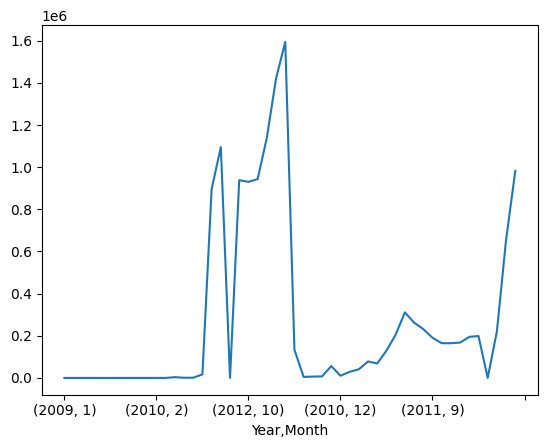

In [ ]:
%%time

# Os dados carregados da pasta bitcoin_parquet_clean não estão devidamente ordenados
# Obs: no pandas o uso do groupby como feito nesse código iria ordenar os dados por padrão,
# não é o caso do Dask

bitcoin_df.groupby(['Year', 'Month'])\
    ['Height']\
    .count()\
    .rename('Transactions_Count')\
    .compute()\
    .plot()

CPU times: user 379 ms, sys: 43.5 ms, total: 423 ms
Wall time: 2.88 s


<Axes: xlabel='Year,Month'>

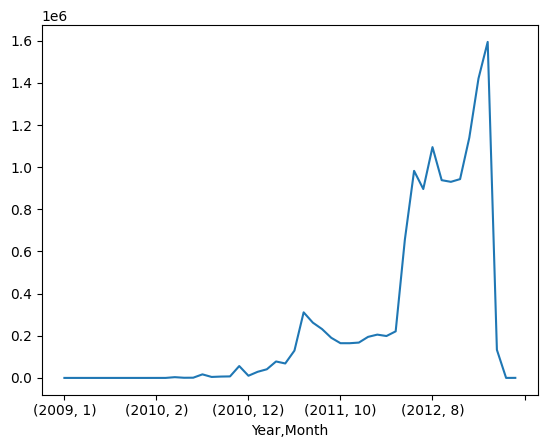

In [ ]:
%%time

# Para ordenar os dados é possível usar o argumento sort

bitcoin_df.groupby(['Year', 'Month'], sort=True)\
    ['Height']\
    .count()\
    .rename('Transactions_Count')\
    .compute()\
    .plot()

In [ ]:
# Vamos criar uma nova coluna 'Year_Month' que é a concatenação do 'Year' com 'Month'

bitcoin_df['Year_Month'] = bitcoin_df['Year'].astype(str) +\
                           bitcoin_df['Month'].astype(str).str.zfill(2)
bitcoin_df.head()

,Height,Sum,Time,Date,Year,Month,Day,Weekday,Year_Month
0,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3,200901
1,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3,200901
2,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3,200901
3,586,250.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3,200901
4,586,50.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3,200901


In [ ]:
%%time

# Agora vamos criar uma lista ordenada com todos os valores existentes na coluna 'Year_Month'

year_month_list = bitcoin_df['Year_Month']\
    .unique()\
    .compute()\
    .tolist()
year_month_list = sorted(year_month_list)
print(year_month_list)

['200901', '200902', '200903', '200904', '200905', '200908', '200910', '200911', '200912', '201001', '201002', '201003', '201004', '201005', '201006', '201007', '201008', '201009', '201010', '201011', '201012', '201101', '201102', '201103', '201104', '201105', '201106', '201107', '201108', '201109', '201110', '201111', '201112', '201201', '201202', '201203', '201204', '201205', '201206', '201207', '201208', '201209', '201210', '201211', '201212', '201301', '201302', '201303', '201305', '201403']
CPU times: user 1.67 s, sys: 160 ms, total: 1.83 s
Wall time: 26.1 s


In [ ]:
len(year_month_list)

50

In [ ]:
%%time

# Com a coluna nova 'Year_Month', nós podemos colocar ela como índice e fazer um repartition
# usando o argumento divisions. Dessa forma nós garantimos que cada ano e mês tem seus dados
# em uma determinada partição

bitcoin_df.set_index('Year_Month')\
    .repartition(divisions=year_month_list)\
    .to_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_year_month_idx', overwrite=True, engine='pyarrow')

CPU times: user 10.1 s, sys: 1.08 s, total: 11.2 s
Wall time: 2min 25s


In [ ]:
bitcoin_df = dd.read_parquet(f'{ROOT_DATA_PATH}/bitcoin_parquet_year_month_idx', engine='pyarrow')
bitcoin_df

,Height,Sum,Time,Date,Year,Month,Day,Weekday
npartitions=49,,,,,,,,
,int64,float64,datetime64[ns],object,int64,int64,int64,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [ ]:
bitcoin_df.head()

,Height,Sum,Time,Date,Year,Month,Day,Weekday
Year_Month,,,,,,,,
200901,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
200901,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
200901,546,25.00,2009-01-15 06:08:20,2009-01-15,2009,1,15,3
200901,586,250.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3
200901,586,50.00,2009-01-15 14:25:20,2009-01-15,2009,1,15,3


Código 1:

CPU times: user 411 ms, sys: 39.2 ms, total: 450 ms
Wall time: 2.95 s


<Axes: xlabel='Year_Month'>

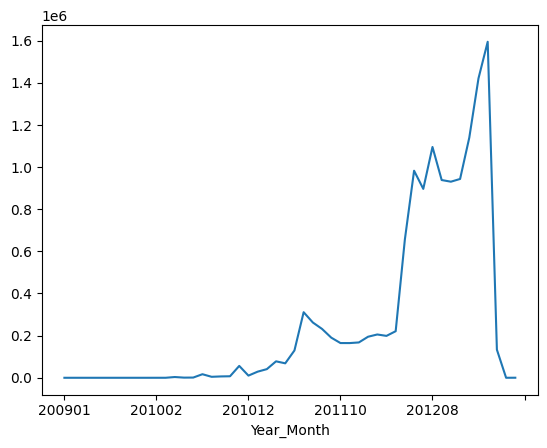

In [ ]:
%%time

# Note que agora count por ano e mês é mais demorado. Provavelmente porque existem menos
# partições, fazendo com que a thread fique presa por mais tempo e resultando em mais tempos
# ociosos nas thread quando a mesma vai processar a próxima task

bitcoin_df.groupby('Year_Month')\
    ['Height']\
    .count()\
    .rename('Transactions_Count')\
    .compute()\
    .plot()

Código 2:

CPU times: user 697 ms, sys: 98.7 ms, total: 795 ms
Wall time: 7.77 s


<Axes: xlabel='Year_Month'>

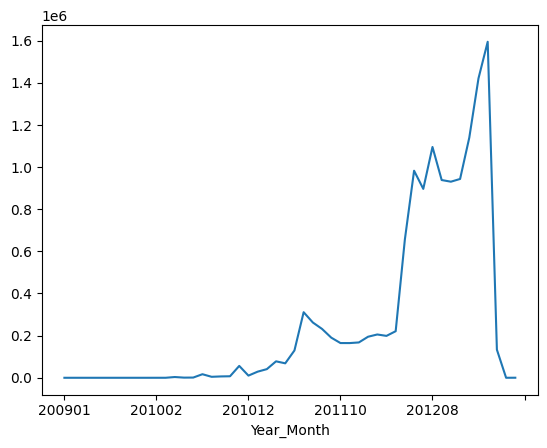

In [ ]:
%%time

# Agora também é possível ter o mesmo resultado usando o index no groupby
# Perceba a queda significativa na performance

bitcoin_df.groupby(bitcoin_df.index)\
    ['Height']\
    .count()\
    .rename('Transactions_Count')\
    .compute()\
    .plot()

A diferença de desempenho entre os dois códigos pode estar relacionada à forma como o Dask otimiza operações em partições quando há um índice que pode ser usado eficientemente. No Código 1, usa-se `groupby('Year_Month')`, onde 'Year_Month' já é um índice, enquanto no Código 2 usa-se `groupby(bitcoin_df.index)`, onde index é o índice padrão do DataFrame.

Quando se usa `groupby('Year_Month')`, o Dask pode otimizar o cálculo e reduzir a quantidade de dados que precisa ser movida entre as partições, aproveitando o índice existente. No entanto, no Código 2, quando se usa `groupby(bitcoin_df.index)`, o Dask pode não ser capaz de otimizar tão eficientemente, resultando em um tempo de cálculo maior.

Portanto, ao realizar operações de groupby em índices, é geralmente mais eficiente usar diretamente o nome do índice existente ('Year_Month' no caso em questão), se disponível, em vez de referenciar index. Isso permite que o Dask aproveite melhor as otimizações relacionadas ao índice existente.